In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\capstone2_vif.csv')

In [3]:
df.columns.values

array(['Unnamed: 0', 'TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2',
       'EXT_SOURCE_1', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'CNT_DRAWINGS_ATM_CURRENT_y', 'NAME_INCOME_TYPE_Working',
       'DAYS_DECISION', 'FLOORSMAX_MODE', 'CODE_GENDER_M',
       'DAYS_LAST_PHONE_CHANGE',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'DAYS_INSTALMENT', 'AMT_DRAWINGS_ATM_CURRENT', 'DAYS_ID_PUBLISH',
       'AMT_INST_MIN_REGULARITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_x',
       'AMT_PAYMENT', 'ENTRANCES_MODE', 'NAME_INCOME_TYPE_Pensioner',
       'CNT_DRAWINGS_POS_CURRENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'HOUSETYPE_MODE_block of flats',
       'FLAG_DOCUMENT_3', 'SELLERPLACE_AREA', 'AMT_DRAWINGS_POS_CURRENT',
       'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'DAYS_LAST_DUE_1ST_VERSION', 'BASEMENTAREA_AVG',
       'OCCUPATION_TYPE_Laborers', 'OWN_CAR_AGE', 'FLOORSMIN_MODE',
       'HOUR_APPR_PROCESS_START_y', 'CNT_

In [4]:
#First, we will create our independent variable
X = df[['EXT_SOURCE_3', 'EXT_SOURCE_2',
       'EXT_SOURCE_1', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'CNT_DRAWINGS_ATM_CURRENT_y', 'NAME_INCOME_TYPE_Working',
       'DAYS_DECISION', 'FLOORSMAX_MODE', 'CODE_GENDER_M',
       'DAYS_LAST_PHONE_CHANGE',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'DAYS_INSTALMENT', 'AMT_DRAWINGS_ATM_CURRENT', 'DAYS_ID_PUBLISH',
       'AMT_INST_MIN_REGULARITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_x',
       'AMT_PAYMENT', 'ENTRANCES_MODE', 'NAME_INCOME_TYPE_Pensioner',
       'CNT_DRAWINGS_POS_CURRENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'HOUSETYPE_MODE_block of flats',
       'FLAG_DOCUMENT_3', 'SELLERPLACE_AREA', 'AMT_DRAWINGS_POS_CURRENT',
       'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'DAYS_LAST_DUE_1ST_VERSION', 'BASEMENTAREA_AVG',
       'OCCUPATION_TYPE_Laborers', 'OWN_CAR_AGE', 'FLOORSMIN_MODE',
       'HOUR_APPR_PROCESS_START_y', 'CNT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_PAYMENT_CURRENT', 'AMT_ANNUITY']] 

In [5]:
y = df['TARGET']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [8]:
clf.feature_importances_

array([0.05969447, 0.07933072, 0.03216939, 0.05825305, 0.00446721,
       0.01477775, 0.00689725, 0.04991985, 0.01277749, 0.00797577,
       0.04734565, 0.00510339, 0.05032728, 0.01267868, 0.05638933,
       0.01266258, 0.03705536, 0.04401081, 0.05330351, 0.01610253,
       0.00327018, 0.00880525, 0.00968543, 0.00717229, 0.00527097,
       0.00657942, 0.04872319, 0.00764477, 0.01421025, 0.0067549 ,
       0.05022711, 0.01850348, 0.00689276, 0.0193625 , 0.01037436,
       0.04807081, 0.00260583, 0.00241841, 0.01225546, 0.04993056])

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9195026832438918


Confusion matrix:
 [[27575    10]
 [ 2405    11]]


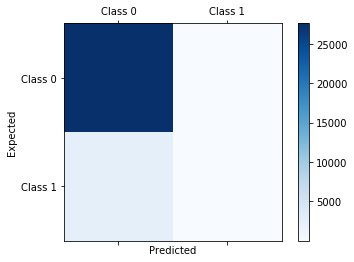

In [10]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score

cv5 = cross_val_score(clf, X, y, cv=5)
cvmean = np.mean(cv5)
print(cv5, cvmean)

[0.91895405 0.91905405 0.91915404 0.91884594 0.91919596] 0.9190408087976019


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     27585
          1       0.52      0.00      0.01      2416

avg / total       0.89      0.92      0.88     30001



In [13]:
##Well it looks like our model just decided to guess 0 for almost every data point.  
#This is due to the large difference between payment problems and no payment problems
#We will first try undersampling to see if that changes its approach

In [14]:
count_class_0, count_class_1 = df.TARGET.value_counts()
df_class_0 = df[df['TARGET'] == 0]
df_class_1 = df[df['TARGET'] == 1]
print(df_class_0.shape, df_class_1.shape)

(91908, 42) (8093, 42)


In [15]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())

Random under-sampling:
1    8093
0    8093
Name: TARGET, dtype: int64


In [16]:
X = df_test_under[['EXT_SOURCE_3', 'EXT_SOURCE_2',
       'EXT_SOURCE_1', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'CNT_DRAWINGS_ATM_CURRENT_y', 'NAME_INCOME_TYPE_Working',
       'DAYS_DECISION', 'FLOORSMAX_MODE', 'CODE_GENDER_M',
       'DAYS_LAST_PHONE_CHANGE',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'DAYS_INSTALMENT', 'AMT_DRAWINGS_ATM_CURRENT', 'DAYS_ID_PUBLISH',
       'AMT_INST_MIN_REGULARITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_x',
       'AMT_PAYMENT', 'ENTRANCES_MODE', 'NAME_INCOME_TYPE_Pensioner',
       'CNT_DRAWINGS_POS_CURRENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'HOUSETYPE_MODE_block of flats',
       'FLAG_DOCUMENT_3', 'SELLERPLACE_AREA', 'AMT_DRAWINGS_POS_CURRENT',
       'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'DAYS_LAST_DUE_1ST_VERSION', 'BASEMENTAREA_AVG',
       'OCCUPATION_TYPE_Laborers', 'OWN_CAR_AGE', 'FLOORSMIN_MODE',
       'HOUR_APPR_PROCESS_START_y', 'CNT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_PAYMENT_CURRENT', 'AMT_ANNUITY']] 

In [17]:
y = df_test_under['TARGET']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6680395387149918


Confusion matrix:
 [[1682  771]
 [ 841 1562]]


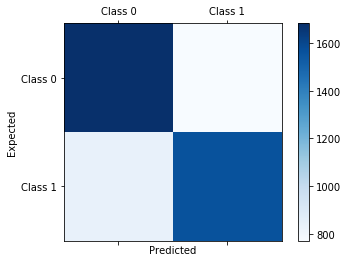

In [21]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [22]:
feature_imp = pd.Series(clf.feature_importances_, index= X.columns.values).sort_values(ascending=False)
feature_imp.sort_values(ascending=False)

EXT_SOURCE_2                                         0.090437
EXT_SOURCE_3                                         0.083090
DAYS_BIRTH                                           0.060297
DAYS_ID_PUBLISH                                      0.048843
AMT_GOODS_PRICE_x                                    0.046436
DAYS_LAST_PHONE_CHANGE                               0.046351
AMT_PAYMENT                                          0.046137
DAYS_DECISION                                        0.045420
SELLERPLACE_AREA                                     0.045418
DAYS_LAST_DUE_1ST_VERSION                            0.044625
AMT_ANNUITY                                          0.043918
DAYS_INSTALMENT                                      0.043693
HOUR_APPR_PROCESS_START_y                            0.042408
EXT_SOURCE_1                                         0.040821
AMT_DOWN_PAYMENT                                     0.036255
OWN_CAR_AGE                                          0.020360
BASEMENT

In [23]:
dfunder = df_test_under[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'SELLERPLACE_AREA', 'DAYS_LAST_DUE_1ST_VERSION',
             'DAYS_DECISION', 'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE_x', 'AMT_ANNUITY', 'DAYS_INSTALMENT', 'AMT_PAYMENT',
             'HOUR_APPR_PROCESS_START_y']]
#We will use these columns for the model since they have the highest importance (> 0.04)


In [32]:
#This model is less accurate but seems to be using both predicitons instead of just guessing 0 repeatedly

In [24]:
from sklearn.model_selection import cross_val_score

cv5 = cross_val_score(clf, X, y, cv=5)
cv5mean = np.mean(cv5)
print(cv5, cv5mean)

[0.66831377 0.67541692 0.6581223  0.66656366 0.66718171] 0.6671196720648114


In [25]:
cv10 = cross_val_score(clf, X, y, cv=10)
cv10mean = np.mean(cv10)
print(cv5, cv5mean)

[0.66831377 0.67541692 0.6581223  0.66656366 0.66718171] 0.6671196720648114


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.69      0.68      2453
          1       0.67      0.65      0.66      2403

avg / total       0.67      0.67      0.67      4856



In [27]:
feature_imp = pd.Series(clf.feature_importances_, index= X.columns.values).sort_values(ascending=False)
feature_imp.sort_values(ascending=False)

EXT_SOURCE_2                                         0.090437
EXT_SOURCE_3                                         0.083090
DAYS_BIRTH                                           0.060297
DAYS_ID_PUBLISH                                      0.048843
AMT_GOODS_PRICE_x                                    0.046436
DAYS_LAST_PHONE_CHANGE                               0.046351
AMT_PAYMENT                                          0.046137
DAYS_DECISION                                        0.045420
SELLERPLACE_AREA                                     0.045418
DAYS_LAST_DUE_1ST_VERSION                            0.044625
AMT_ANNUITY                                          0.043918
DAYS_INSTALMENT                                      0.043693
HOUR_APPR_PROCESS_START_y                            0.042408
EXT_SOURCE_1                                         0.040821
AMT_DOWN_PAYMENT                                     0.036255
OWN_CAR_AGE                                          0.020360
BASEMENT

In [28]:
##Now let's look at oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.TARGET.value_counts())

Random over-sampling:
1    91908
0    91908
Name: TARGET, dtype: int64


In [29]:
X = df_test_over[['EXT_SOURCE_3', 'EXT_SOURCE_2',
       'EXT_SOURCE_1', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'CNT_DRAWINGS_ATM_CURRENT_y', 'NAME_INCOME_TYPE_Working',
       'DAYS_DECISION', 'FLOORSMAX_MODE', 'CODE_GENDER_M',
       'DAYS_LAST_PHONE_CHANGE',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'DAYS_INSTALMENT', 'AMT_DRAWINGS_ATM_CURRENT', 'DAYS_ID_PUBLISH',
       'AMT_INST_MIN_REGULARITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_x',
       'AMT_PAYMENT', 'ENTRANCES_MODE', 'NAME_INCOME_TYPE_Pensioner',
       'CNT_DRAWINGS_POS_CURRENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'HOUSETYPE_MODE_block of flats',
       'FLAG_DOCUMENT_3', 'SELLERPLACE_AREA', 'AMT_DRAWINGS_POS_CURRENT',
       'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'DAYS_LAST_DUE_1ST_VERSION', 'BASEMENTAREA_AVG',
       'OCCUPATION_TYPE_Laborers', 'OWN_CAR_AGE', 'FLOORSMIN_MODE',
       'HOUR_APPR_PROCESS_START_y', 'CNT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_PAYMENT_CURRENT', 'AMT_ANNUITY']] 

In [30]:
y = df_test_over['TARGET']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9957385075709493


Confusion matrix:
 [[27301   225]
 [   10 27609]]


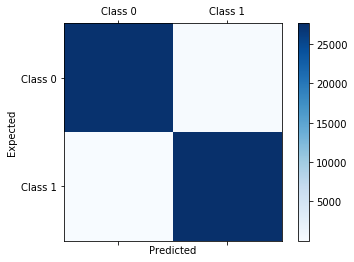

In [34]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00     27526
          1       0.99      1.00      1.00     27619

avg / total       1.00      1.00      1.00     55145



In [36]:
cv5 = cross_val_score(clf, X, y, cv=5)
cv5mean = np.mean(cv5)
print(cv5, cv5mean)

[0.99741595 0.99774236 0.99706234 0.99684457 0.99681737] 0.9971765168309599


In [38]:
cv10 = cross_val_score(clf, X, y, cv=10)
cv10mean = np.mean(cv10)
print(cv10, cv10mean)

[0.99825917 0.99891198 0.99836797 0.99891198 0.99804156 0.99787836
 0.99836797 0.99787836 0.99798694 0.99787813] 0.9982482413782041


In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index= X.columns.values).sort_values(ascending=False)
feature_imp.sort_values(ascending=False)

In [ ]:
##Wow!! This model gets both right almost all the time. This time, we've for sure solved credit modeling.
#Let's test for overfitting just to make sure though